In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

print(os.getcwd() )

/Users/matt/Projects/training/ds_training/data_manipulation_in_python/section-3


In [202]:
df= pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Bar Plots

In [203]:
#pandas
chest_pain = df.groupby(by="cp").median().reset_index()
chest_pain

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


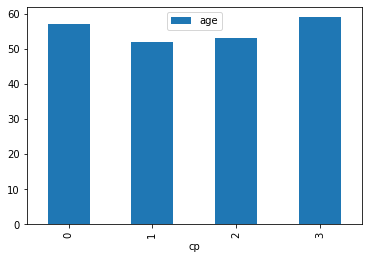

In [204]:
chest_pain.plot.bar(x="cp", y="age");

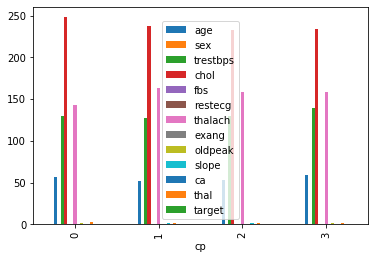

In [205]:
chest_pain.plot.bar(x="cp");

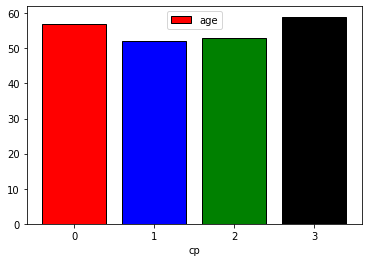

In [206]:
#matplotlib
fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age",
        edgecolor="k", color=["red", "blue", "green", "black"])
ax.set_xlabel("cp")
ax.set_xticks(chest_pain["cp"]);
ax.legend();


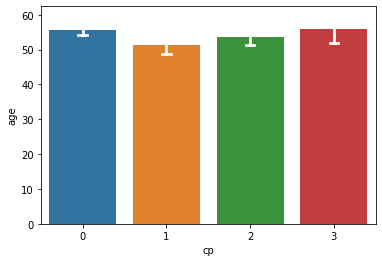

In [207]:
#seaborn
#calculates the median and error bars
ax = sb.barplot("cp", "age", errcolor="w", capsize=0.1, data=df)

## Scatter Plots

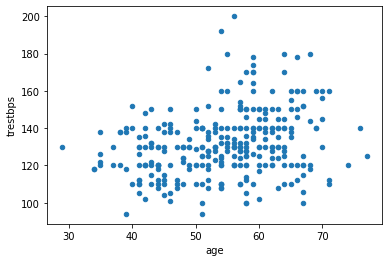

In [208]:
df.plot.scatter("age","trestbps")

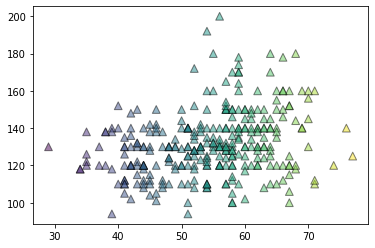

In [209]:
#maplotlib
fix, ax = plt.subplots()
ax.scatter(df["age"], df["trestbps"], 
           marker="^", s=60, c=df["age"],
           edgecolors="k", alpha=0.5);


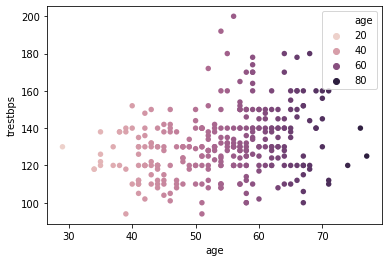

In [210]:
#seaborn
sb.scatterplot("age", "trestbps", hue="age", 
               s=30, edgecolor="none", data=df);

## Line Plots

In [211]:
#pandas
ages = df.groupby("age").median().reset_index()
ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


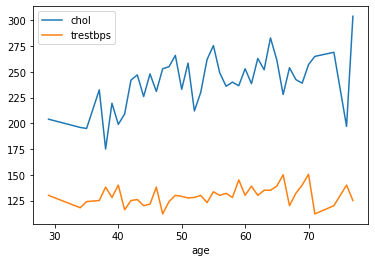

In [212]:
ages.plot.line("age", ["chol", "trestbps"]);

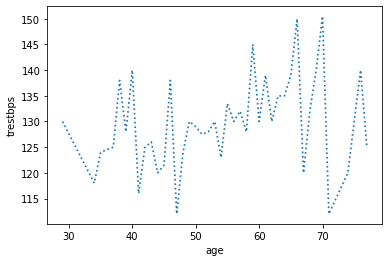

In [213]:
#matplotlib
fix, ax = plt.subplots()
ax.plot(ages["age"], ages["trestbps"], ls=":", lw=1.7)
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

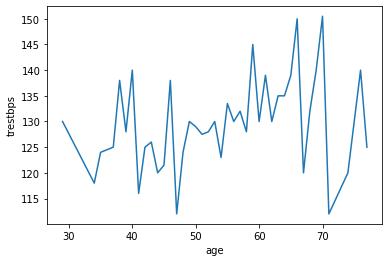

In [214]:
#seaborn
sb.lineplot("age", "trestbps", data=ages);

## Pandas Vs Matplotlib

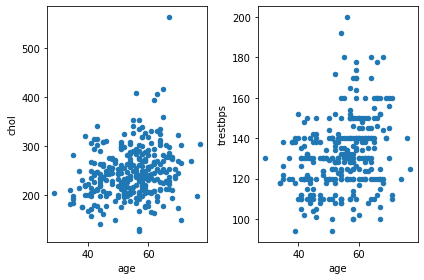

In [215]:
fig, axes = plt.subplots(ncols=2)
df.plot.scatter(x="age", y="chol", ax=axes[0])
df.plot.scatter(x="age", y="trestbps", ax=axes[1])
fig.tight_layout();

In [216]:
fig2 = axes[0].get_figure()
fig2.savefig("plots.png", dpi=100, bbox_inches="tight", transparent=True) #png
fig2.savefig("plots.pdf", bbox_inches="tight") #pdf

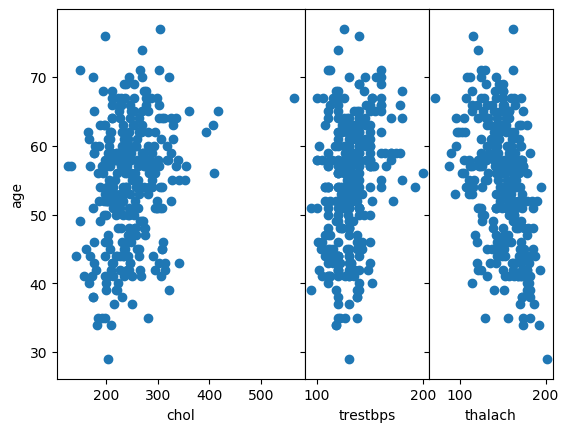

In [217]:
#advanced formatting with matplotlib
with plt.style.context("default"):
    fig, axes = plt.subplots(ncols=3, sharey=True,
                gridspec_kw={"width_ratios": [2,1,1], "wspace": 0})
    y = "age"
    xs = ["chol", "trestbps", 'thalach']
    for x, ax, in zip(xs, axes):
        ax.scatter(df[x], df[y])
        ax.set_xlabel(x)
        axes[0].set_ylabel(y)

## Visualizing 1D Distributions
### Histograms

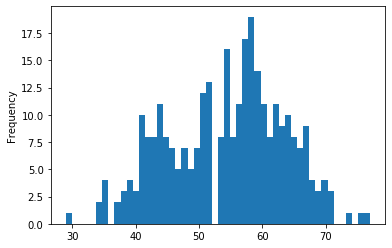

In [218]:
df.age.plot.hist(bins=50);

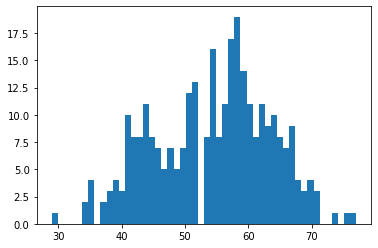

In [219]:
#matplotlib
plt.hist(df.age, bins=50);

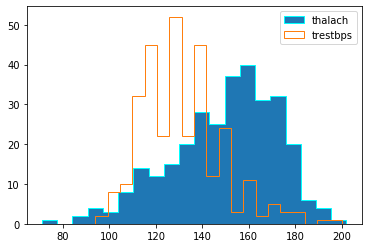

In [220]:
#matplotlib custom
fig, ax = plt.subplots()
ax.hist(df.thalach, bins=20, histtype="stepfilled", 
        label="thalach", alpha=1, edgecolor="cyan")
ax.hist(df.trestbps, bins=20, histtype="step", label="trestbps")
ax.legend();

## Box Plots
Shows mean, quartiles, IQR, and outliers

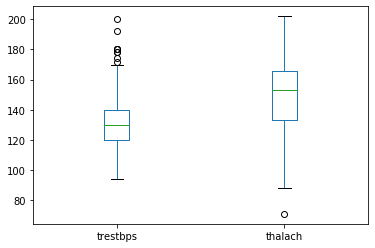

In [221]:
#pandas
df[["trestbps", "thalach"]].plot.box();

#whiskers go out to 1.5 times distance of the quartile ranges or to end of data
#circles denote outliers

In [222]:
df[["trestbps", "thalach"]].describe()

,trestbps,thalach
count,303.000000,303.000000
mean,131.623762,149.646865
std,17.538143,22.905161
min,94.000000,71.000000
25%,120.000000,133.500000
50%,130.000000,153.000000
75%,140.000000,166.000000
max,200.000000,202.000000


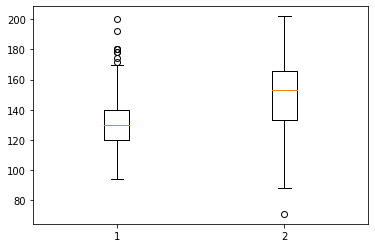

In [223]:
#matplotlib
plt.boxplot(df[["trestbps", "thalach"]].to_numpy());

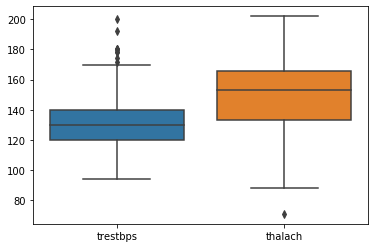

In [224]:
#seaborn
sb.boxplot(data=df[["trestbps", "thalach"]]);

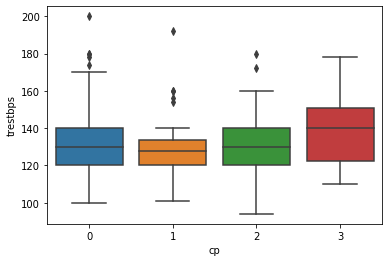

In [225]:
#use seaborn to do a group by boxplot
sb.boxplot(x="cp", y="trestbps", data=df);

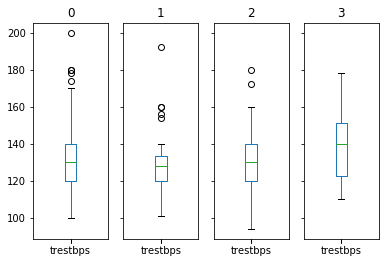

In [226]:
#pandas groupby
df.groupby("cp").boxplot(column="trestbps", sharex=True, 
                         layout=(1,4), grid=False);

## Violin Plots

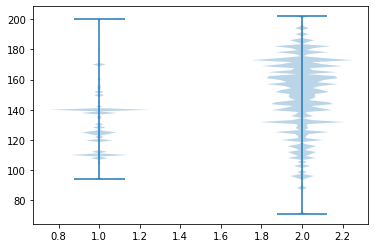

In [227]:
#matplotlib
fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy(), bw_method=.01);

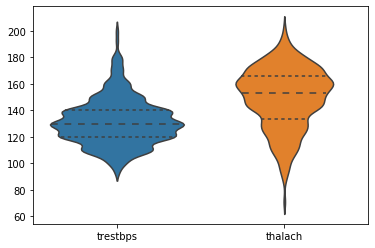

In [228]:
#seaborn
sb.violinplot(data=df[["trestbps", "thalach"]], inner="quartile", bw=.2);

## Bee Swarm Plots

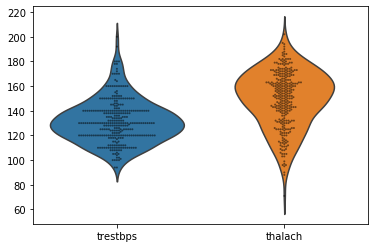

In [229]:
#seaborn
sb.violinplot(data=df[["trestbps", "thalach"]],  inner=None);
sb.swarmplot(data=df[["trestbps", "thalach"]], size=2, color="k", alpha=.5)

## Visualizing 2D Distributions
### Histograms

In [230]:
df = pd.read_csv("meteorite-landings.csv")
df.head()
df= df.dropna(subset=["reclong", "reclat"])
df = df[df.reclong < 300]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38400 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38400 non-null  object 
 1   id           38400 non-null  int64  
 2   nametype     38400 non-null  object 
 3   recclass     38400 non-null  object 
 4   mass         38282 non-null  float64
 5   fall         38400 non-null  object 
 6   year         38225 non-null  float64
 7   reclat       38400 non-null  float64
 8   reclong      38400 non-null  float64
 9   GeoLocation  38400 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


### 2D Histograms

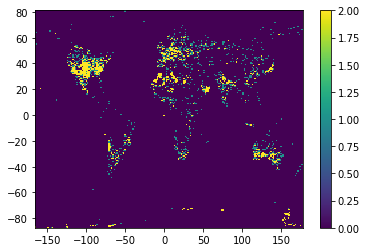

In [231]:
#matplotlib
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=2)
plt.colorbar();

### 2D Hex Plots

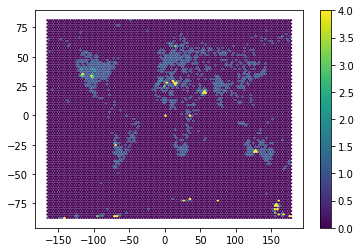

In [232]:
#matplotlib
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0)
plt.colorbar();

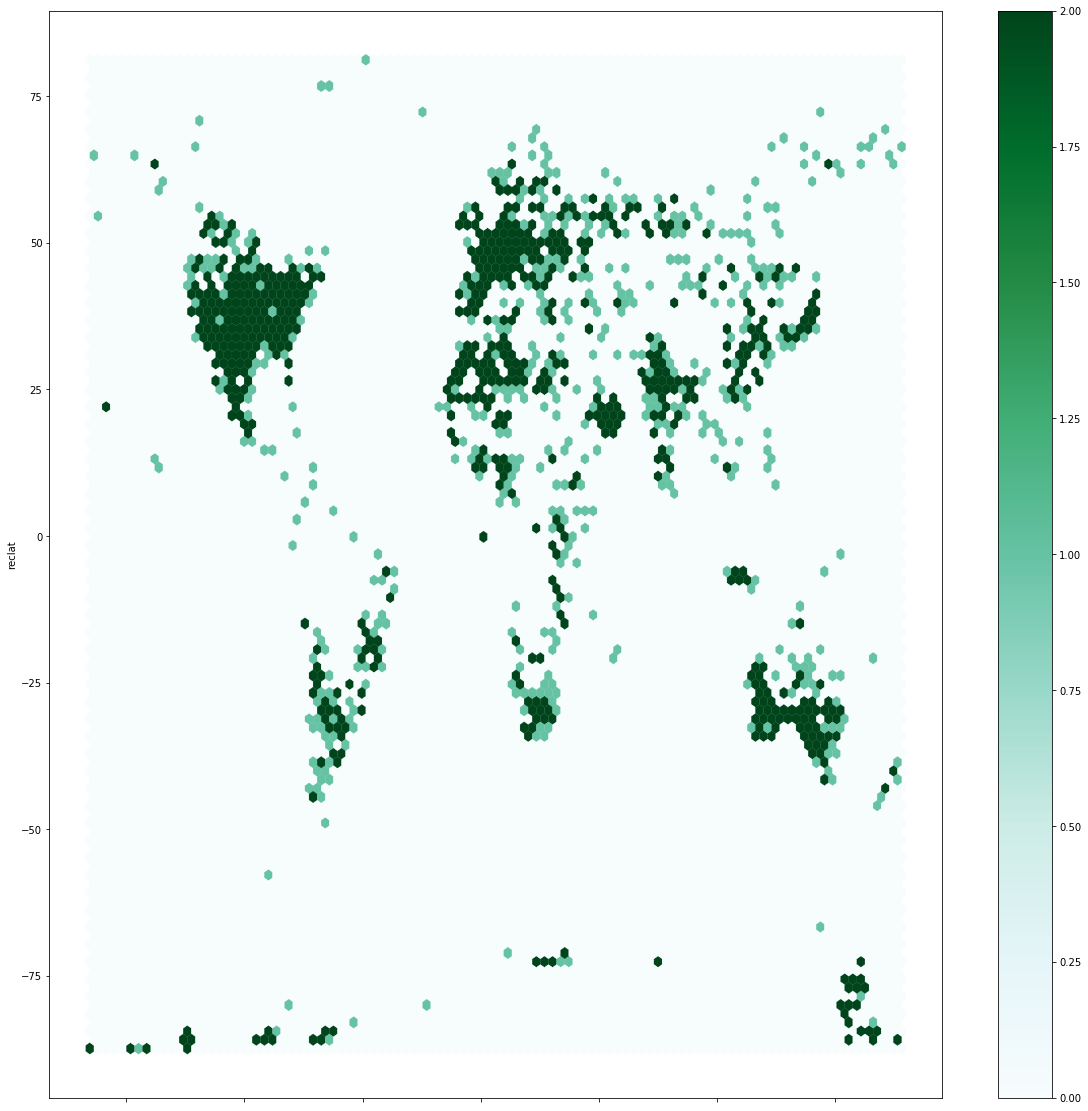

In [233]:
#pandas
df.plot.hexbin(figsize=(20,20), x="reclong", y="reclat", vmax=2, gridsize=100, linewidth=.25);

### Contour Plots

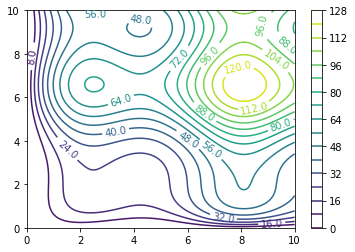

In [234]:
spacing = np.linspace(0, 10, 200)
X,Y = np.meshgrid(spacing, spacing)
Z=(np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X*Y))**2

c = plt.contour(X, Y, Z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

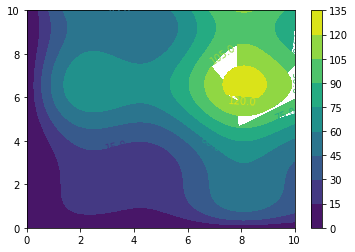

In [235]:
spacing = np.linspace(0, 10, 200)
X,Y = np.meshgrid(spacing, spacing)
Z=(np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X*Y))**2

c = plt.contourf(X, Y, Z, levels=10)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

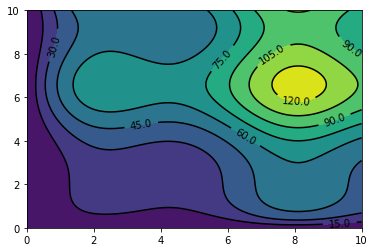

In [236]:
plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");

## KDE

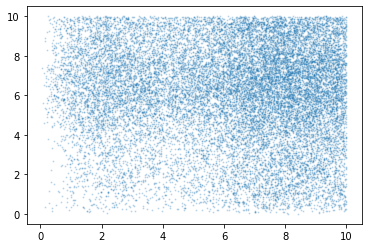

In [237]:
# Rejection Sampling = a way to brute force sample any surface so long as you're fine
# waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random .uniform(0,1,n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=.2);

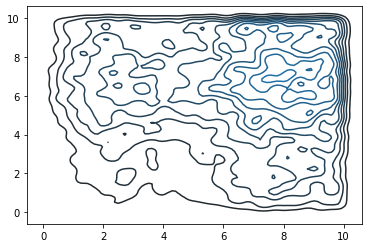

In [238]:
#seaborn
sb.kdeplot(xs,ys, bw=.2);

## Jointplots

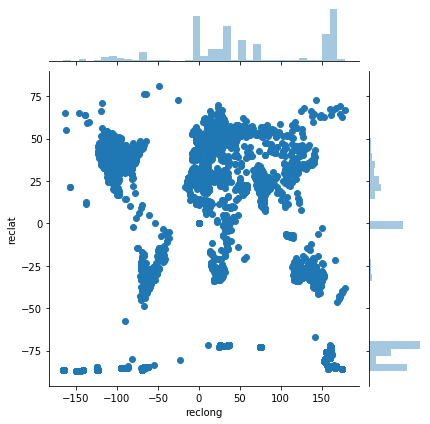

In [239]:
#seaborn
sb.jointplot(data=df, x="reclong", y="reclat");

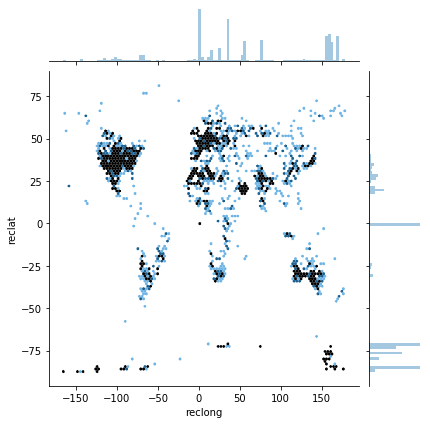

In [240]:
#seaborn
sb.jointplot(data=df, x="reclong", y="reclat", kind="hex",
             gridsize= 100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

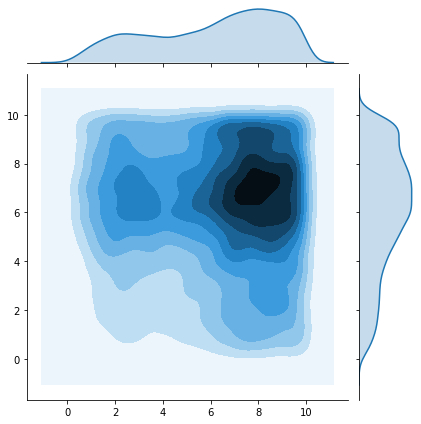

In [241]:
sb.jointplot(x=xs, y=ys, kind="kde");

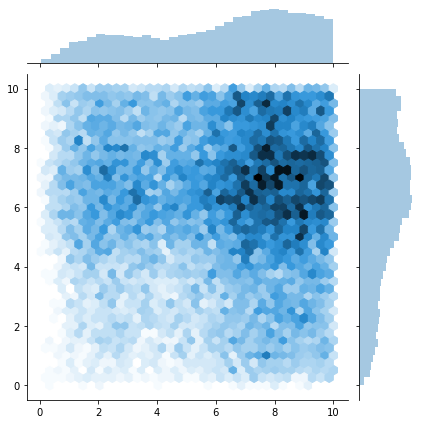

In [242]:
sb.jointplot(x=xs, y=ys, kind="hex");

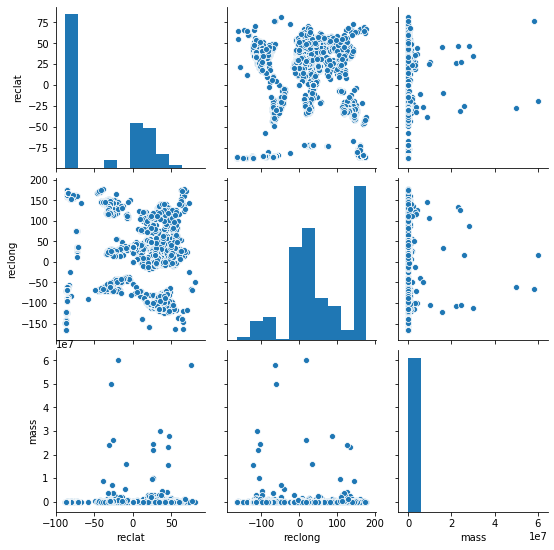

In [243]:
sb.pairplot(data=df[["reclat", "reclong", "mass"]]);

## Styling Pandas Tables

In [244]:
df = pd.DataFrame(np.random.normal(size=(6,6)), columns=[x for x in "ABCDEF"])
df

,A,B,C,D,E,F
0,-1.600146,0.484955,0.212176,0.157609,1.839897,-0.080701
1,-0.252037,-0.669288,0.094702,-0.873820,-0.277041,-0.341550
2,1.359552,-0.454246,-0.377179,1.008397,-0.237030,1.479778
3,-0.531036,-1.799413,0.706387,1.588837,0.618383,1.247147
4,1.449576,-2.933922,1.384643,0.349010,0.326467,1.006558
5,-2.534944,1.187178,-0.168228,-0.901658,0.669391,-0.042162


In [245]:
def neg_red(x):
    return f"color: {'red' if x < 0 else 'white'}"
df.style.applymap(neg_red)

,A,B,C,D,E,F
0,-1.600146,0.484955,0.212176,0.157609,1.839897,-0.080701
1,-0.252037,-0.669288,0.094702,-0.873820,-0.277041,-0.341550
2,1.359552,-0.454246,-0.377179,1.008397,-0.237030,1.479778
3,-0.531036,-1.799413,0.706387,1.588837,0.618383,1.247147
4,1.449576,-2.933922,1.384643,0.349010,0.326467,1.006558
5,-2.534944,1.187178,-0.168228,-0.901658,0.669391,-0.042162


In [246]:
def gold_max(xs):
    m = xs.to_numpy().max()
    color = {True:"background-color: #c78f2e", False:""}
    is_max = (xs == m).replace(color)
    return is_max
df.style.apply(gold_max, axis=0) 
#axis=None shows max for whole table, axis=0 max per column
#axis=1 max per row

,A,B,C,D,E,F
0,-1.600146,0.484955,0.212176,0.157609,1.839897,-0.080701
1,-0.252037,-0.669288,0.094702,-0.873820,-0.277041,-0.341550
2,1.359552,-0.454246,-0.377179,1.008397,-0.237030,1.479778
3,-0.531036,-1.799413,0.706387,1.588837,0.618383,1.247147
4,1.449576,-2.933922,1.384643,0.349010,0.326467,1.006558
5,-2.534944,1.187178,-0.168228,-0.901658,0.669391,-0.042162


In [252]:
#using standard colormap
df.style.background_gradient(cmap="magma")

,A,B,C,D,E,F
0,-1.600146,0.484955,0.212176,0.157609,1.839897,-0.080701
1,-0.252037,-0.669288,0.094702,-0.873820,-0.277041,-0.341550
2,1.359552,-0.454246,-0.377179,1.008397,-0.237030,1.479778
3,-0.531036,-1.799413,0.706387,1.588837,0.618383,1.247147
4,1.449576,-2.933922,1.384643,0.349010,0.326467,1.006558
5,-2.534944,1.187178,-0.168228,-0.901658,0.669391,-0.042162


In [261]:
df.abs().style.bar(align="left", width=95) #bars show relative size of columns

,A,B,C,D,E,F
0,1.600146,0.484955,0.212176,0.157609,1.839897,0.080701
1,0.252037,0.669288,0.094702,0.873820,0.277041,0.341550
2,1.359552,0.454246,0.377179,1.008397,0.237030,1.479778
3,0.531036,1.799413,0.706387,1.588837,0.618383,1.247147
4,1.449576,2.933922,1.384643,0.349010,0.326467,1.006558
5,2.534944,1.187178,0.168228,0.901658,0.669391,0.042162


In [271]:
#same but for positive and negative
head ={"selector": "th", "props": [("text-align", "center")]} #this is to center headers
df.style.set_table_styles([head]).bar(align="mid", color=['red', 'green'], vmin=-3, vmax=3)

,A,B,C,D,E,F
0,-1.600146,0.484955,0.212176,0.157609,1.839897,-0.080701
1,-0.252037,-0.669288,0.094702,-0.873820,-0.277041,-0.341550
2,1.359552,-0.454246,-0.377179,1.008397,-0.237030,1.479778
3,-0.531036,-1.799413,0.706387,1.588837,0.618383,1.247147
4,1.449576,-2.933922,1.384643,0.349010,0.326467,1.006558
5,-2.534944,1.187178,-0.168228,-0.901658,0.669391,-0.042162


In [272]:

#chaining together all the styles
df.style.bar(align="mid", width=50).apply(gold_max, axis=None).applymap(neg_red)

,A,B,C,D,E,F
0,-1.600146,0.484955,0.212176,0.157609,1.839897,-0.080701
1,-0.252037,-0.669288,0.094702,-0.873820,-0.277041,-0.341550
2,1.359552,-0.454246,-0.377179,1.008397,-0.237030,1.479778
3,-0.531036,-1.799413,0.706387,1.588837,0.618383,1.247147
4,1.449576,-2.933922,1.384643,0.349010,0.326467,1.006558
5,-2.534944,1.187178,-0.168228,-0.901658,0.669391,-0.042162


## N-Dimensional Distributions

### Scatter Matrix

In [276]:
from sklearn import manifold

df= pd.read_csv("heart.csv")
target = df["target"].to_numpy()
df = df[["age", "sex", "cp", "trestbps", "chol", "thalach"]]
df.head()

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163


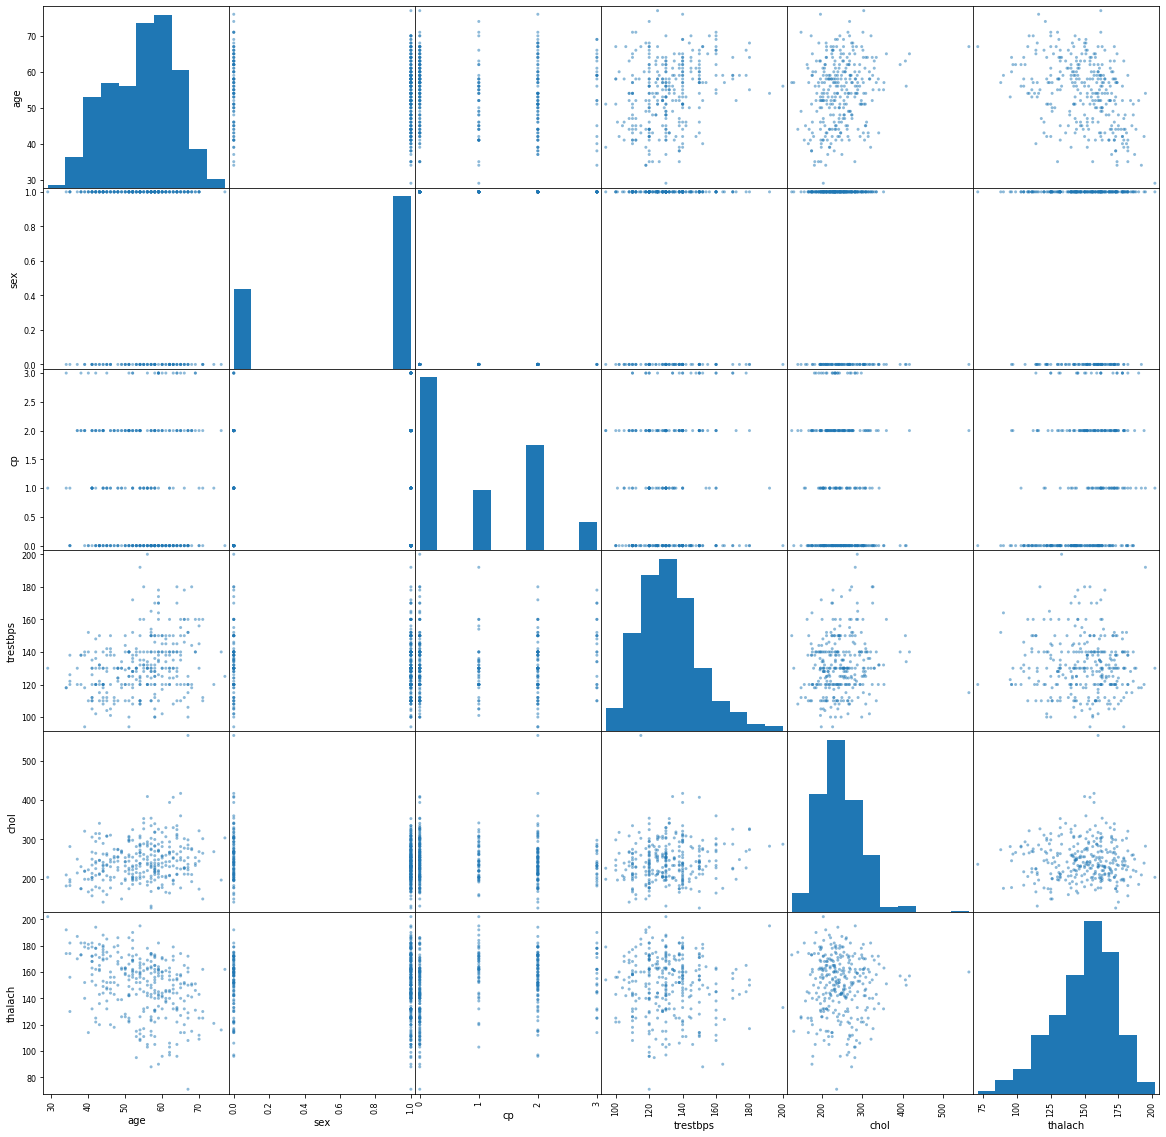

In [281]:
#pandas
pd.plotting.scatter_matrix(df, figsize=(20,20));

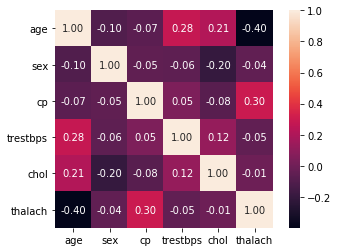

In [283]:
#seaborn
#correlation matrix heatmap  shows correlations between values
ax = sb.heatmap(df.corr(), annot=True, square=True, fmt="0.2f");

### Manifold Learning

In [287]:
np.random.seed(0)
n= 2000
t = np.linspace(0,20,n)
x = t* np.sin(t) + .2 * np.random.normal(size=n)
y = t* np.cos(t) + .2 * np.random.normal(size=n)
z = np.log(t+1) * np.sin(np.sqrt(t)) + .1* np.random.normal(size=n)
a = np.log(t+1) * np.cos(np.sqrt(t)) + .1* np.random.normal(size=n)

df2 = pd.DataFrame({"x":x, "y":y, "z":z, "a":a})
data = df2.to_numpy()


,x,y,z,a
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.360849,0.877923,-0.406901,-1.461376
std,7.941966,8.334053,1.501548,0.900743
min,-17.585398,-16.057913,-3.196104,-2.713032
25%,-4.857295,-3.720618,-1.858372,-2.238221
50%,0.194884,0.215940,-0.061514,-1.688477
75%,5.129059,6.116446,1.030298,-0.887885
max,18.259029,19.217775,1.748841,0.640328


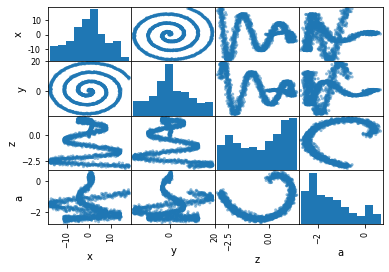

In [288]:
pd.plotting.scatter_matrix(df2);

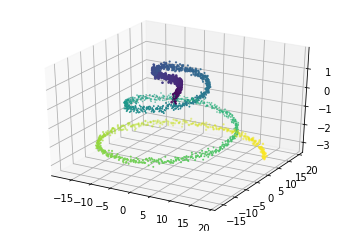

In [291]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c=t, s=3+a);